In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#
# Load the Boston Housing dataset for training
#
bhd = datasets.load_boston()
df = pd.DataFrame(bhd.data)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = bhd.target

In [3]:
print(bhd.data.shape)
print(bhd.target.shape)
print(df.shape)
print(type(df))

(506, 13)
(506,)
(506, 14)
<class 'pandas.core.frame.DataFrame'>


In [4]:
#
# Select Avg. No of rooms per dwelling as feature
# and fit the model
#
X = df['RM'].to_numpy().reshape(-1, 1)
# X = df.to_numpy()[:, :13]
y = df['MEDV'].to_numpy().reshape(-1, 1)
# print(f'RM: {X.shape}\nMEDV: {y.shape}')
# print(f'room: {X[2]}')
# print(f'MEDV: {y[2]}')
#
# Create an instance of RANSACRegressor
#
ransac = RANSACRegressor(base_estimator=LinearRegression(), 
                         min_samples=50, max_trials=100,
                         loss='absolute_loss', random_state=42,
                         residual_threshold=10)
#
# Fit the model
#
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=42,
                residual_threshold=10, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [12]:
#
# Get the Inlier mask; Create outlier mask
#
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(all(inlier_mask!=outlier_mask))
print(f'inlier_mask: {inlier_mask.shape}')
print(f'outlier_mask: {outlier_mask.shape}')

True
inlier_mask: (506,)
outlier_mask: (506,)


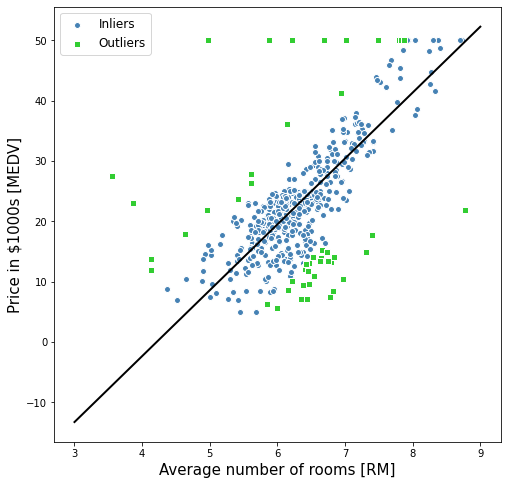

In [6]:
#
# Create scatter plot for inlier datset
#
plt.figure(figsize=(8, 8))
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
#
# Create scatter plot for outlier datset
#
plt.scatter(X[outlier_mask], y[outlier_mask],
             c='limegreen', edgecolor='white',
             marker='s', label='Outliers')
#
# Draw the best fit line
#
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]', fontsize=15)
plt.ylabel('Price in $1000s [MEDV]', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.show()